# Alzheimers disease prediction

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
alz_data = pd.read_csv("oasis_longitudinal.csv")

In [3]:
#show first and last 5 r0ws of the dataset
#show shape of dataset

alz_data.head(6)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [5]:
alz_data.tail(6)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [6]:
alz_data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
alz_data.shape

(373, 15)

In [8]:
alz_data.info

<bound method DataFrame.info of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    A

In [9]:
#to check for sum of null values in the dataset
alz_data.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [10]:
alz_data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [11]:
alz_data.describe(include='object')

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


In [11]:
#convert to string values in dataset to numeric values
alz_data['M/F'] = alz_data['M/F'].replace(['F','M'],[0,1])
alz_data['Group'] =alz_data['Group'].replace(['Demented','Nondemented',"Converted"],[0,1,2])



In [12]:
alz_data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,0,2,842,1,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,0,3,2297,1,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,1,1,0,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,1,2,763,0,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


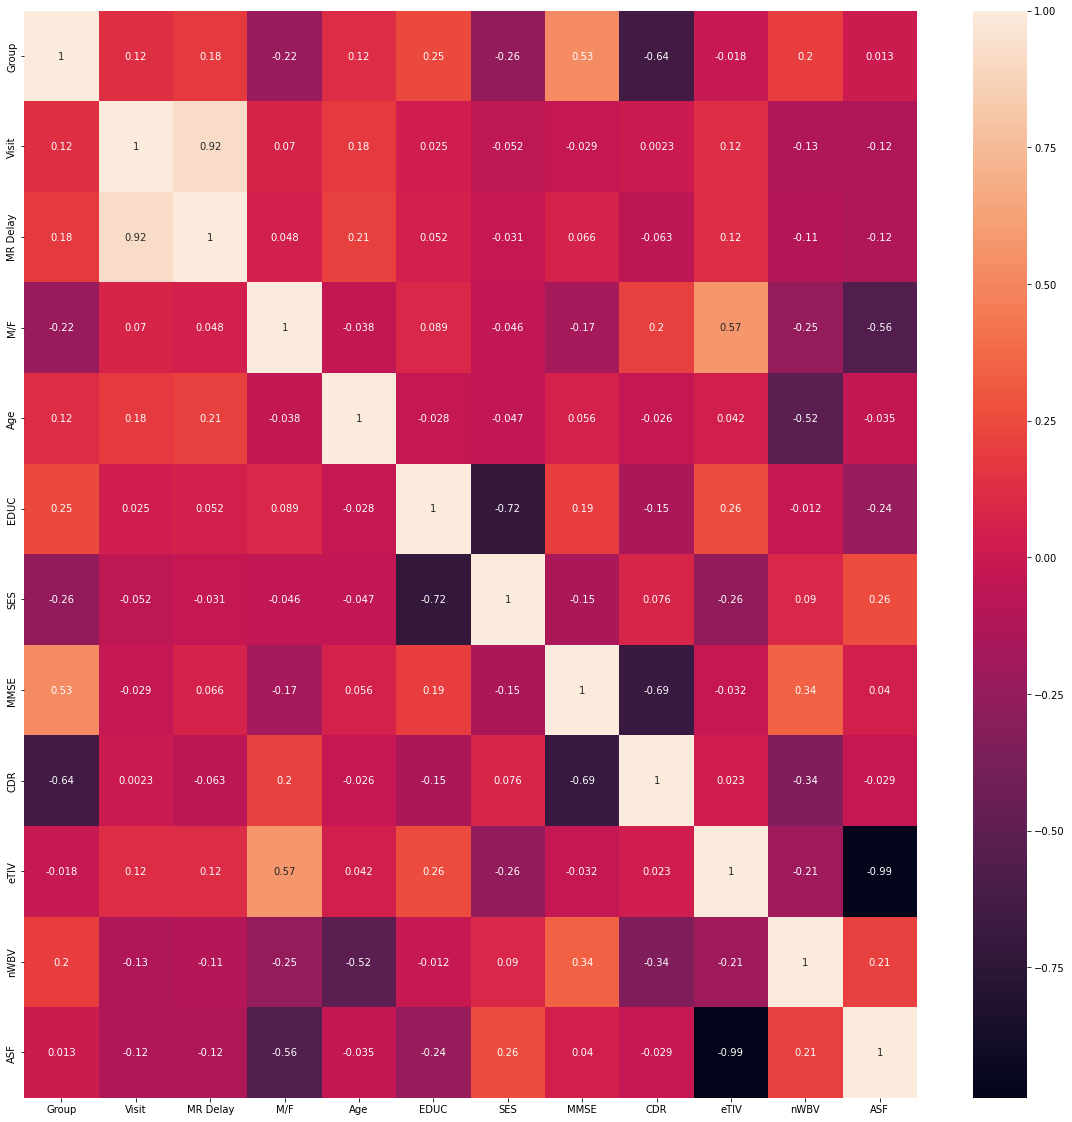

In [13]:
#check for correlations of each features in the dataset
corrmat = alz_data.corr()
plt.figure(figsize=(20,20))
alz_plot = sns.heatmap(corrmat,annot=True)


In [14]:
alz_data.corr()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.124035,0.181517,-0.223323,0.116711,0.245096,-0.262975,0.525996,-0.639454,-0.017597,0.195440,0.012773
Visit,0.124035,1.000000,0.920009,0.069791,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.181517,0.920009,1.000000,0.048006,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
M/F,-0.223323,0.069791,0.048006,1.000000,-0.037726,0.089279,-0.045776,-0.166860,0.202140,0.572549,-0.249618,-0.561647
Age,0.116711,0.183213,0.205357,-0.037726,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.245096,0.024615,0.051630,0.089279,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.262975,-0.051622,-0.030813,-0.045776,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,0.525996,-0.029078,0.065844,-0.166860,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,-0.639454,0.002325,-0.062915,0.202140,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,-0.017597,0.117428,0.119624,0.572549,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877


<AxesSubplot:xlabel='M/F', ylabel='count'>

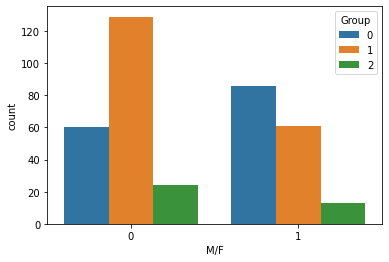

In [15]:
# lets compare the Group(Demented, Converted and Nondemented) of Alzheimer among sex(gender)
# we will be using seaborn
sns.countplot(alz_data['M/F'],hue=alz_data['Group'])

The graph shows that males has more records of dementia cases than females. 
The graph also indicates higher cases of Nondemented and converted cases in female subjects than the males.

In [ ]:
Using a displot to further show the variation among in various the Group and Sex(Gender)

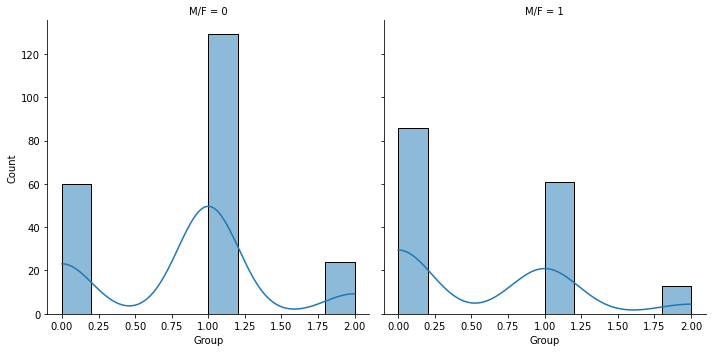

In [16]:
sns.displot(data=alz_data, x="Group", col="M/F", kde=True)

Using jointplot to joint distribution between nWBV(Normalize Whole Brain Volume)and Age, 
alongside the Groups(Nondemented, Demented and Converted)

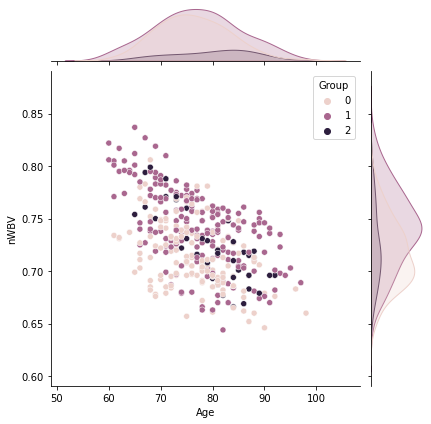

In [17]:

sns.jointplot(data=alz_data, x="Age", y="nWBV", hue="Group")

In [ ]:
from the chart, we could find more distribution of Nondemented among subjects with 
higher whole blood volume(nWBV) and of the younger age.

In [ ]:
Using relplot to find joint distribution between CDR - Clinical Dementia Rating,
MMSE - Mini Mental State Examination,SES - Socioeconomic Status and Age,
alongside the Groups(1-Nondemented, 0-Demented and Converted)

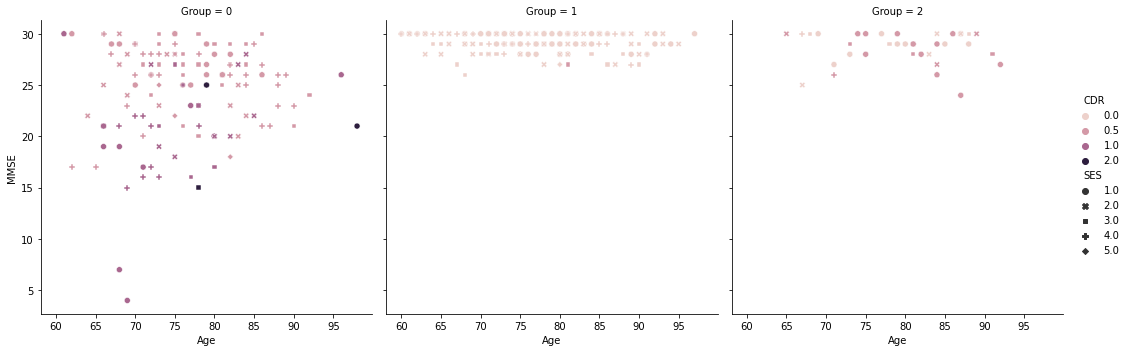

In [18]:
sns.relplot(
    data=alz_data, x="Age", y="MMSE",
    col="Group", hue="CDR", style="SES",
    kind="scatter"
)

###Correlation between CDR, Group and Age

<AxesSubplot:xlabel='Age', ylabel='CDR'>

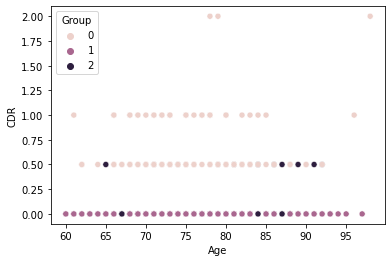

In [19]:
sns.scatterplot(data=alz_data, x="Age", y="CDR", hue="Group")

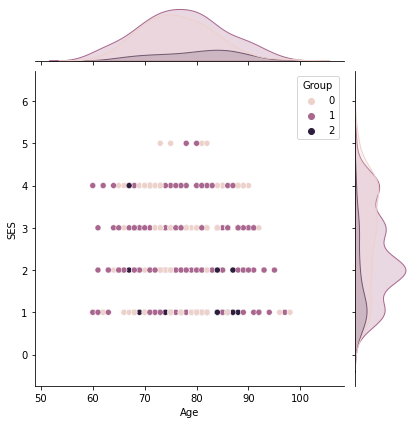

In [20]:
sns.jointplot(data=alz_data, x="Age", y="SES", hue="Group")

<AxesSubplot:xlabel='Group', ylabel='MMSE'>

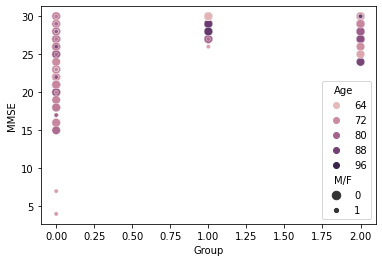

In [23]:
sns.scatterplot(x="Group", y="MMSE", data=alz_data, hue="Age", size='M/F')

<AxesSubplot:xlabel='Group', ylabel='Count'>

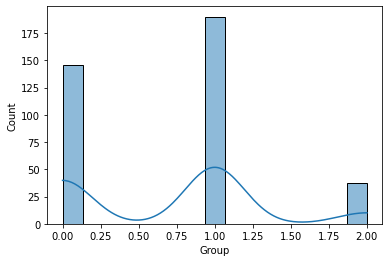

In [24]:
sns.histplot(alz_data["Group"], kde=True, bins=15)

In [25]:
alz_data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,0,2,842,1,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,0,3,2297,1,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,1,1,0,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,1,2,763,0,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split


In [31]:
feature_columns = ['M/F', 'Age', 'EDUC', 'CDR', 'eTIV', 'nWBV', 'ASF']
predicted_label = ['Group']

In [32]:
x = alz_data[feature_columns].values
y = alz_data[predicted_label].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set

# Multiple Regression

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results

In [34]:
y_pred = regressor.predict(x_test)

In [35]:
y_pred

array([[ 0.39314719],
       [ 0.84336204],
       [ 1.00240107],
       [ 0.47430776],
       [ 0.86444953],
       [ 0.39230526],
       [ 1.18766209],
       [ 0.68330399],
       [ 0.23996248],
       [ 0.68279745],
       [ 0.42551058],
       [ 1.27005854],
       [ 1.02182079],
       [ 0.62732717],
       [-0.2180873 ],
       [ 0.51084974],
       [ 0.72083447],
       [ 0.87440743],
       [ 1.08134101],
       [ 1.12297998],
       [ 1.07694218],
       [ 0.62575965],
       [-0.06358589],
       [ 1.17609209],
       [ 0.42015852],
       [-0.12677727],
       [-0.18596582],
       [ 0.73365355],
       [ 1.25201189],
       [ 0.78344926],
       [ 0.31635956],
       [ 1.04972229],
       [ 1.18787396],
       [ 0.75053801],
       [ 0.902228  ],
       [ 1.36088889],
       [ 0.44058197],
       [-0.01484217],
       [ 1.17935792],
       [-0.04511642],
       [ 0.47181557],
       [ 1.10805579],
       [ 0.31806088],
       [ 0.58421377],
       [ 1.11452206],
       [ 1

In [ ]:
# Calculating the Coefficients, bearing in mind. y = m*x + c for linear graph

In [36]:
print(regressor.coef_)

[[-1.29310658e-01  1.28933436e-02  4.20742349e-02 -9.79251638e-01
  -1.79381959e-03  1.08654987e+00 -2.28202209e+00]]


In [ ]:
# Calculating the intercept

In [37]:
print(regressor.intercept_)

[4.04303175]


In [38]:
# Calculating the R squared value. R squared value a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. 
#In other words, r-squared shows how well the data fit the regression model (the goodness of fit)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

#y_test is the actual value, the one given while y_pred is the ones marked out for prediction

0.4020904194450562

In [ ]:
#A measure r_2 below 0.4 would show a low correlation.

# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [47]:
# Make predictions for the test set
y_pred_test = random_forest_model.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accuracy_score(y_test, y_pred_test)   

0.9066666666666666

In [ ]:
 #This model has an accuracy score of 90% on the test data. That seems pretty impressive

In [ ]:
#Since Accuracy is not a great measure of classifier performance,
#We need to use confusion matrix to understand how well the model really performed

In [ ]:
# Confusion Matrics

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

In [54]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[30,  0,  0],
       [ 1, 36,  1],
       [ 3,  2,  2]])

In [55]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

<AxesSubplot:>

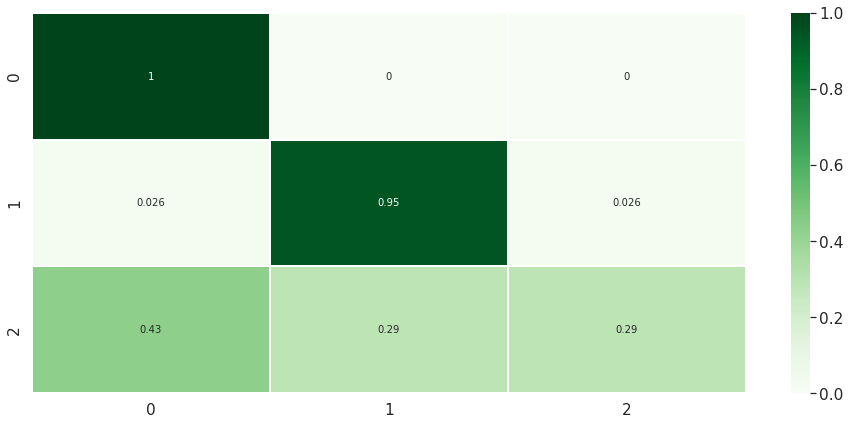

In [56]:
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

In [58]:
# Classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       0.95      0.95      0.95        38
           2       0.67      0.29      0.40         7

    accuracy                           0.91        75
   macro avg       0.83      0.74      0.76        75
weighted avg       0.90      0.91      0.89        75



In [ ]:
#F1-score is a measure of a model's accuracy on a dataset.
#recall is the ratio of the relevant results returned by the search engine to the total number of the relevant results that could have been returned.
#Accuracy is calculated as the number of all correct predictions divided by the total number of the dataset.

#from our prediction, we have an accuracy of 0.91 or 91%